# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import requests

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
print (city_count)

633


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    "appid": api_key,
    "units": "imperial",
    "q":city
}

i= 0
j= 1
# Loop through the list of cities and perform a request for data on each
weather_data = []
for city in cities:
    params["q"]= city
    response = requests.get(base_url, params=params)
    response_json = response.json()
     
    try:
        data = {
            "city": city,
            "country":response_json["sys"]["country"],
            "lat": response_json["coord"]["lat"],
            "lon": response_json["coord"]["lon"],
            "name": response_json["name"],
            "temp": response_json["main"]["temp_max"],
            "humidity": response_json["main"]["humidity"],
            "wind": response_json["wind"]["speed"],
            "cloudiness": response_json["clouds"]["all"],
            "date": response_json["dt"]        
        }

# check for a valid city
    except KeyError as e:
        print(f"City not found... skipping" )
    
    print(f"Processing Record {i} of Set {j} | {city}")  

# print(data)
    weather_data.append(data)

# get the data in chunks of 50
    if i == 50: 
        i=0
        if j== 10:
            break
        else:
            j+=1
    else:
        i+=1

# create a dataframe for the weather data
weather_df = pd.DataFrame(weather_data)
weather_df.head()



Processing Record 0 of Set 1 | mahebourg
Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | dunedin
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | bethel
City not found... skipping
Processing Record 7 of Set 1 | nizhneyansk
Processing Record 8 of Set 1 | ust-ilimsk
Processing Record 9 of Set 1 | sterling
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | baruun-urt
City not found... skipping
Processing Record 12 of Set 1 | tsihombe
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | palamos
Processing Record 15 of Set 1 | igrim
Processing Record 16 of Set 1 | roebourne
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | assiniboia
Processing Record 19 of Set 1 | josanicka banja
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | leningradskiy
Processing Record 22 of Set 1 | walvi

Processing Record 34 of Set 4 | hervey bay
City not found... skipping
Processing Record 35 of Set 4 | amderma
City not found... skipping
Processing Record 36 of Set 4 | olafsvik
Processing Record 37 of Set 4 | voh
City not found... skipping
Processing Record 38 of Set 4 | toungoo
Processing Record 39 of Set 4 | saint-philippe
Processing Record 40 of Set 4 | katangi
Processing Record 41 of Set 4 | abu dhabi
Processing Record 42 of Set 4 | aleppo
Processing Record 43 of Set 4 | jacareacanga
Processing Record 44 of Set 4 | thompson
Processing Record 45 of Set 4 | staraya toropa
Processing Record 46 of Set 4 | jinxiang
Processing Record 47 of Set 4 | estevan
Processing Record 48 of Set 4 | beba
City not found... skipping
Processing Record 49 of Set 4 | guekedou
Processing Record 50 of Set 4 | shubarkuduk
Processing Record 0 of Set 5 | wamba
City not found... skipping
Processing Record 1 of Set 5 | sakakah
Processing Record 2 of Set 5 | quatre cocos
Processing Record 3 of Set 5 | lebu
Proce

Processing Record 14 of Set 8 | balaguer
Processing Record 15 of Set 8 | tarabuco
Processing Record 16 of Set 8 | sabha
Processing Record 17 of Set 8 | mayaguez
Processing Record 18 of Set 8 | kavaratti
Processing Record 19 of Set 8 | poum
Processing Record 20 of Set 8 | bubaque
City not found... skipping
Processing Record 21 of Set 8 | maghama
Processing Record 22 of Set 8 | gat
Processing Record 23 of Set 8 | todos santos
Processing Record 24 of Set 8 | otjiwarongo
City not found... skipping
Processing Record 25 of Set 8 | gogrial
Processing Record 26 of Set 8 | evensk
Processing Record 27 of Set 8 | marsh harbour
Processing Record 28 of Set 8 | brigantine
City not found... skipping
Processing Record 29 of Set 8 | ningan
Processing Record 30 of Set 8 | bandarbeyla
City not found... skipping
Processing Record 31 of Set 8 | kuche
City not found... skipping
Processing Record 32 of Set 8 | marcona
Processing Record 33 of Set 8 | muros
Processing Record 34 of Set 8 | terenos
Processing Re

,city,cloudiness,country,date,humidity,lat,lon,name,temp,wind
0,mahebourg,75,MU,1567638859,100,-20.41,57.70,Mahebourg,73.00,5.82
1,fortuna,1,US,1567638831,72,40.60,-124.16,Fortuna,69.01,14.99
2,albany,20,US,1567638859,57,42.65,-73.75,Albany,77.00,14.99
3,dunedin,100,NZ,1567638860,72,-45.87,170.50,Dunedin,52.00,17.00
4,rikitea,100,PF,1567638860,73,-23.12,-134.97,Rikitea,73.44,5.88


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Save Data to csv
weather_df.to_csv("Weather_output.csv")

# Visualize to confirm data 
weather_df.head(10)


,city,cloudiness,country,date,humidity,lat,lon,name,temp,wind
0,mahebourg,75,MU,1567638859,100,-20.41,57.70,Mahebourg,73.00,5.82
1,fortuna,1,US,1567638831,72,40.60,-124.16,Fortuna,69.01,14.99
2,albany,20,US,1567638859,57,42.65,-73.75,Albany,77.00,14.99
3,dunedin,100,NZ,1567638860,72,-45.87,170.50,Dunedin,52.00,17.00
4,rikitea,100,PF,1567638860,73,-23.12,-134.97,Rikitea,73.44,5.88
5,upernavik,89,GL,1567638860,89,72.79,-56.15,Upernavik,41.76,14.76
6,bethel,75,US,1567638860,76,60.79,-161.76,Bethel,55.40,24.16
7,bethel,75,US,1567638860,76,60.79,-161.76,Bethel,55.40,24.16
8,ust-ilimsk,100,RU,1567638861,92,57.96,102.73,Ust-Ilimsk,48.78,9.44
9,sterling,75,US,1567638672,52,39.00,-77.40,Sterling,91.40,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [ ]:
#!pip install tzlocal

09/04/19


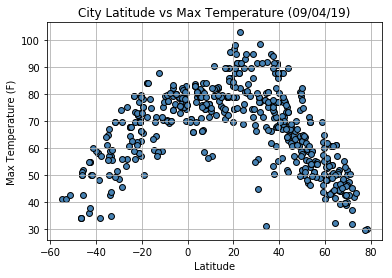

In [6]:
# Build a scatter plot for each data type
#plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")#this is not a dataframe

from datetime import datetime
import tzlocal  # $ pip install tzlocal

#df = weather_df

date=weather_df["date"]

unix_timestamp = float(date[0])
local_timezone = tzlocal.get_localzone() # get pytz timezone
local_time = datetime.fromtimestamp(unix_timestamp, local_timezone)
local_time_format = local_time.strftime("%m/%d/%y")
print(local_time_format)

title = "City Latitude vs Max Temperature (" + local_time_format + ")"
weather_df.plot.scatter(x="lat",y="temp", c="steelblue",s=35, edgecolor="black")  #this uses a dataframe

# Incorporate the other graph properties
plt.title(title)

plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("MaxTemperatureInWorldCities.png")

# Show plot
plt.show()



#### Latitude vs. Humidity Plot

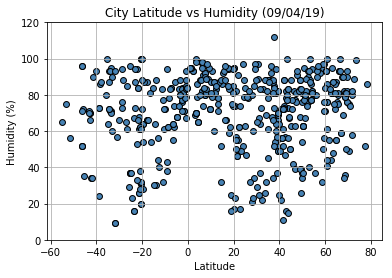

In [7]:
# Build a scatter plot for each data type

title = "City Latitude vs Humidity (" + local_time_format + ")"
weather_df.plot.scatter(x="lat",y="humidity", c="steelblue",s=35, edgecolor="black")  

# Incorporate the other graph properties
plt.title(title)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# don't include the outlier
plt.ylim(0,120)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

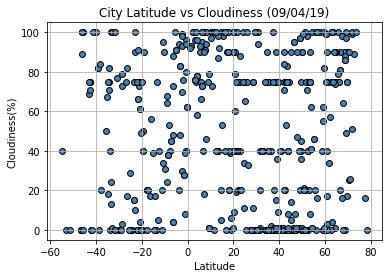

In [8]:
title = "City Latitude vs Cloudiness (" + local_time_format + ")"
weather_df.plot.scatter(x="lat",y="cloudiness", c="steelblue",s=35, edgecolor="black")  

# Incorporate the other graph properties
plt.title(title)
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

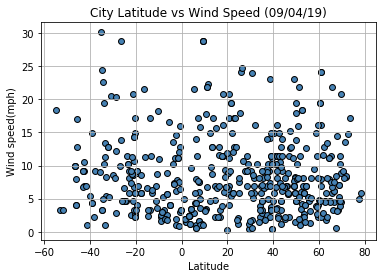

In [9]:
title = "City Latitude vs Wind Speed (" + local_time_format + ")"
weather_df.plot.scatter(x="lat",y="wind", c="steelblue",s=35, edgecolor="black")

# Incorporate the other graph properties
plt.title(title)
plt.ylabel("Wind speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()